In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from biopsykit.utils.dataframe_handling import multi_xs

In [3]:
from sleep_analysis.datasets.mesadataset import MesaDataset

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from fau_colors import register_cmaps

register_cmaps()

sns.set_theme(context="talk", style="white", palette="faculties_light", font_scale=1.2)

%matplotlib widget

In [6]:
test_idx_list = [
    "0027",
    "0077",
    "0111",
    "0169",
    "0193",
    "0197",
    "0204",
    "0269",
    "0306",
    "0372",
    "0388",
    "0393",
    "0408",
    "0474",
    "0526",
    "0548",
    "0586",
    "0599",
    "0672",
    "0683",
    "0807",
    "0856",
    "0889",
    "0921",
    "0923",
    "0934",
    "0935",
    "0962",
    "0967",
    "0968",
    "1080",
    "1113",
    "1164",
    "1187",
    "1209",
    "1294",
    "1297",
    "1308",
    "1395",
    "1453",
    "1474",
    "1476",
    "1497",
    "1502",
    "1552",
    "1563",
    "1570",
    "1584",
    "1589",
    "1620",
    "1672",
    "1677",
    "1704",
    "1707",
    "1735",
    "1766",
    "1768",
    "1797",
    "1821",
    "1844",
    "1856",
    "1874",
    "1878",
    "1884",
    "1921",
    "1964",
    "2003",
    "2043",
    "2119",
    "2139",
    "2145",
    "2163",
    "2193",
    "2251",
    "2279",
    "2372",
    "2388",
    "2397",
    "2429",
    "2464",
    "2519",
    "2604",
    "2614",
    "2659",
    "2685",
    "2701",
    "2738",
    "2762",
    "2780",
    "2820",
    "2834",
    "2913",
    "2930",
    "2952",
    "2987",
    "2988",
    "2995",
    "3003",
    "3006",
    "3028",
    "3053",
    "3066",
    "3094",
    "3104",
    "3112",
    "3224",
    "3297",
    "3317",
    "3337",
    "3344",
    "3352",
    "3375",
    "3415",
    "3423",
    "3486",
    "3516",
    "3520",
    "3529",
    "3537",
    "3622",
    "3630",
    "3634",
    "3656",
    "3664",
    "3690",
    "3717",
    "3745",
    "3760",
    "3793",
    "3795",
    "3803",
    "3855",
    "3892",
    "3971",
    "3974",
    "3976",
    "4017",
    "4128",
    "4190",
    "4199",
    "4240",
    "4277",
    "4301",
    "4330",
    "4334",
    "4379",
    "4394",
    "4480",
    "4488",
    "4500",
    "4515",
    "4541",
    "4563",
    "4580",
    "4592",
    "4641",
    "4648",
    "4677",
    "4723",
    "4729",
    "4777",
    "4826",
    "4888",
    "4980",
    "5002",
    "5006",
    "5009",
    "5096",
    "5103",
    "5104",
    "5131",
    "5167",
    "5261",
    "5292",
    "5298",
    "5304",
    "5318",
    "5351",
    "5362",
    "5393",
    "5427",
    "5440",
    "5532",
    "5550",
    "5608",
    "5656",
    "5680",
    "5722",
    "5784",
    "5792",
    "5847",
    "5882",
    "5888",
    "5896",
    "5906",
    "6000",
    "6009",
    "6027",
    "6029",
    "6050",
    "6115",
    "6205",
    "6262",
    "6274",
    "6280",
    "6291",
    "6292",
    "6298",
    "6306",
    "6311",
    "6333",
    "6384",
    "6460",
    "6462",
    "6501",
    "6509",
    "6566",
    "6610",
    "6632",
    "6671",
    "6697",
    "6726",
    "6784",
    "6807",
]

In [7]:
dataset=MesaDataset()
dataset = dataset.get_subset(subj_id=test_idx_list)

In [8]:
#dataset = dataset[0]
dataset

,subj_id
0,2388
1,0548
2,2834
3,1497
4,2820
...,...
219,3104
220,0169
221,2193
222,4723


In [9]:
features = pd.DataFrame()
sleep_stage = pd.DataFrame()
for subj in dataset:
    feature_table = subj.feature_table
    sleep_stage_table = subj.ground_truth[["5stage"]]

    features = pd.concat([features, feature_table])
    sleep_stage = pd.concat([sleep_stage, sleep_stage_table])
    


In [13]:
features = features[["270_RRV_MCVBB", "_acc_mean_19", "_hrv_median_nni", "_hrv_ratio_sd2_sd1", "270_EDR_MCVBB"]]

In [14]:
features = features.rename(columns={"270_RRV_MCVBB":"RRV MCVBB 9 minute window", "_acc_mean_19":"ACT 10 minute window", "_hrv_median_nni":"HRV Median NN Interval", "_hrv_ratio_sd2_sd1": "HRV SD2/SD1", "270_EDR_MCVBB":"EDR MCVBB 9 minute window"})

In [15]:
merged_df = pd.concat([features, sleep_stage], axis=1)

In [16]:
merged_df = merged_df.set_index("5stage", drop=True)

In [17]:
merged_df

,RRV MCVBB 9 minute window,ACT 10 minute window,HRV Median NN Interval,HRV SD2/SD1,EDR MCVBB 9 minute window
5stage,,,,,
0.0,0.373437,98.000000,687.500000,2.834697,0.211800
0.0,0.373437,77.500000,652.343750,2.064086,0.211800
0.0,0.373437,59.000000,710.937500,3.474394,0.211800
0.0,0.373437,74.500000,720.703125,3.305530,0.211800
0.0,0.363187,82.200000,722.656250,3.591240,0.400410
...,...,...,...,...,...
0.0,0.209802,0.578947,691.406250,3.350862,0.358694
0.0,0.205720,0.578947,673.828125,4.438248,0.404887
0.0,0.258435,7.789474,734.375000,2.555103,0.479337


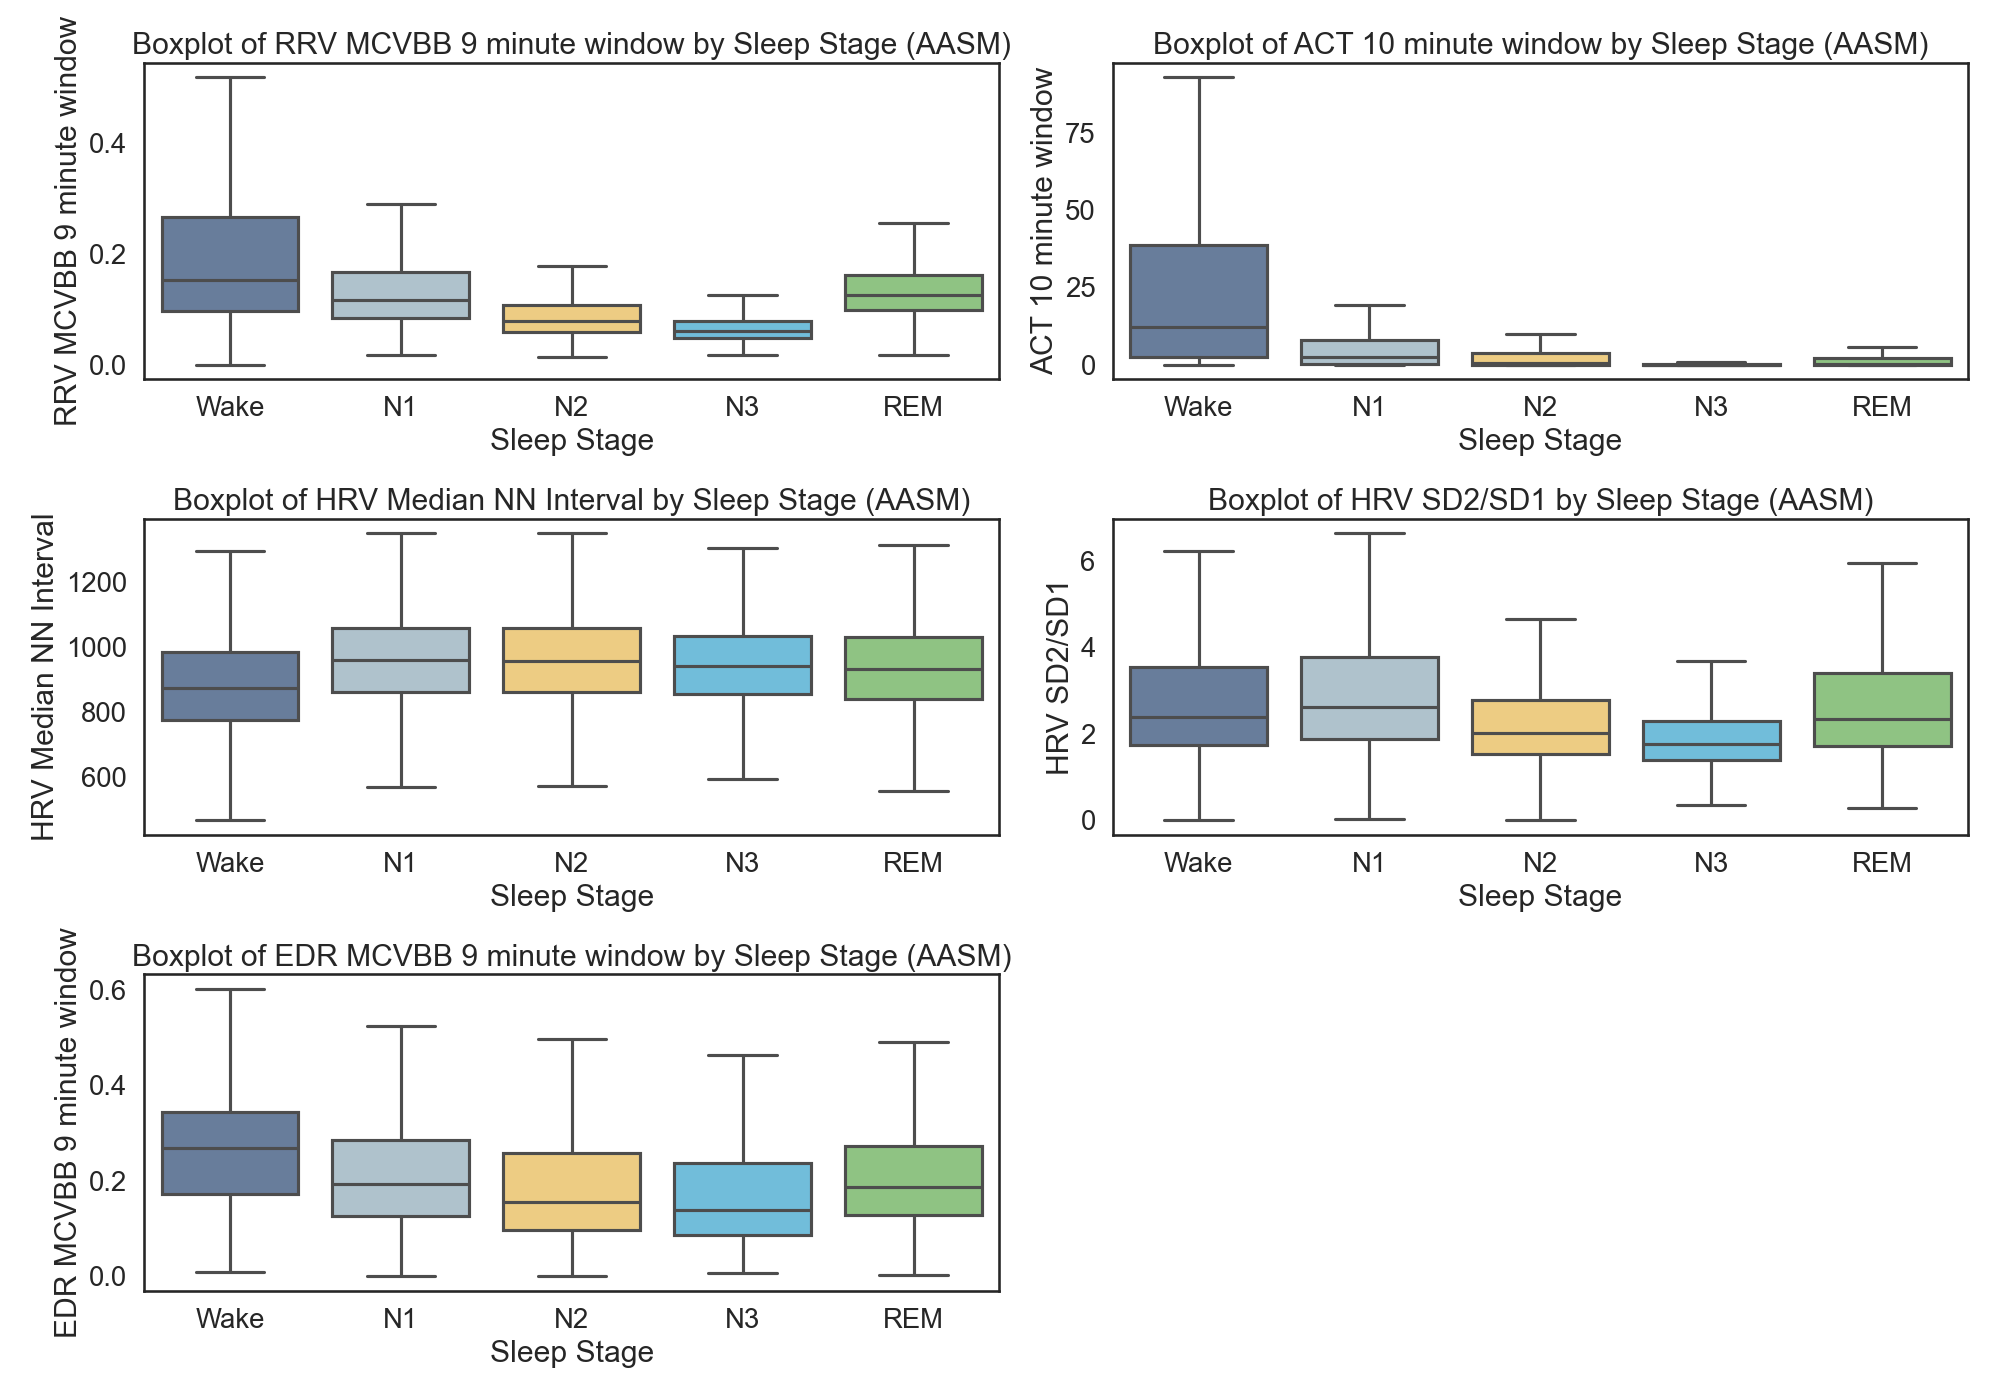

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of features per subplot
num_features = len(features.columns)
rows = 3
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 14))  # Set the figure size
axes = axes.flatten()  # Flatten axes for easy iteration

for i, feature in enumerate(features.columns):
    sns.boxplot(
        data=merged_df.reset_index(),
        x='5stage',
        y=feature,
        showfliers=False,
        ax=axes[i]  # Plot on the specific subplot
    )

    # Customize the subplot
    axes[i].set_title(f'Boxplot of {feature} by Sleep Stage (AASM)')
    axes[i].set_xlabel('Sleep Stage')
    axes[i].set_ylabel(feature)
    axes[i].set_xticks(range(5))
    axes[i].set_xticklabels(['Wake', 'N1', 'N2', 'N3', 'REM'])

# Hide any unused subplots
for j in range(len(features.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig("feature_validation_MESA.pdf")

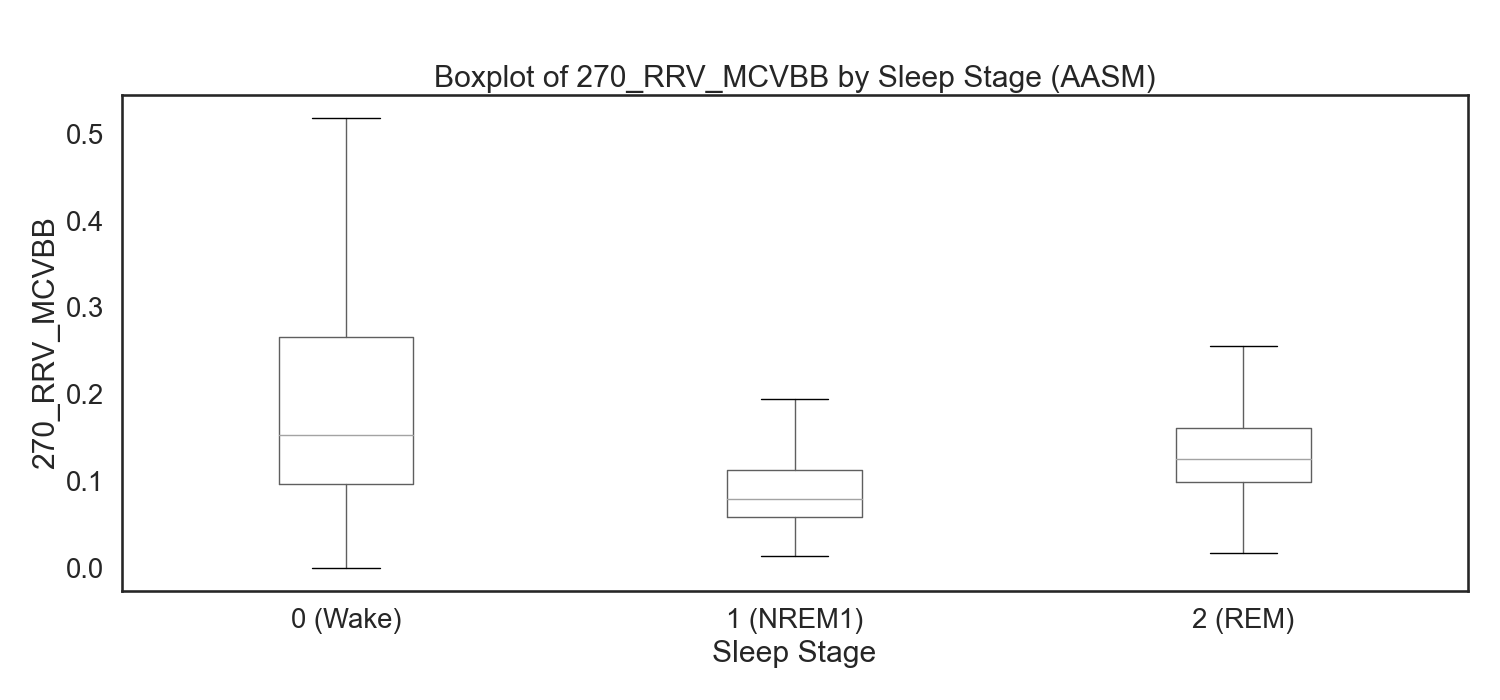

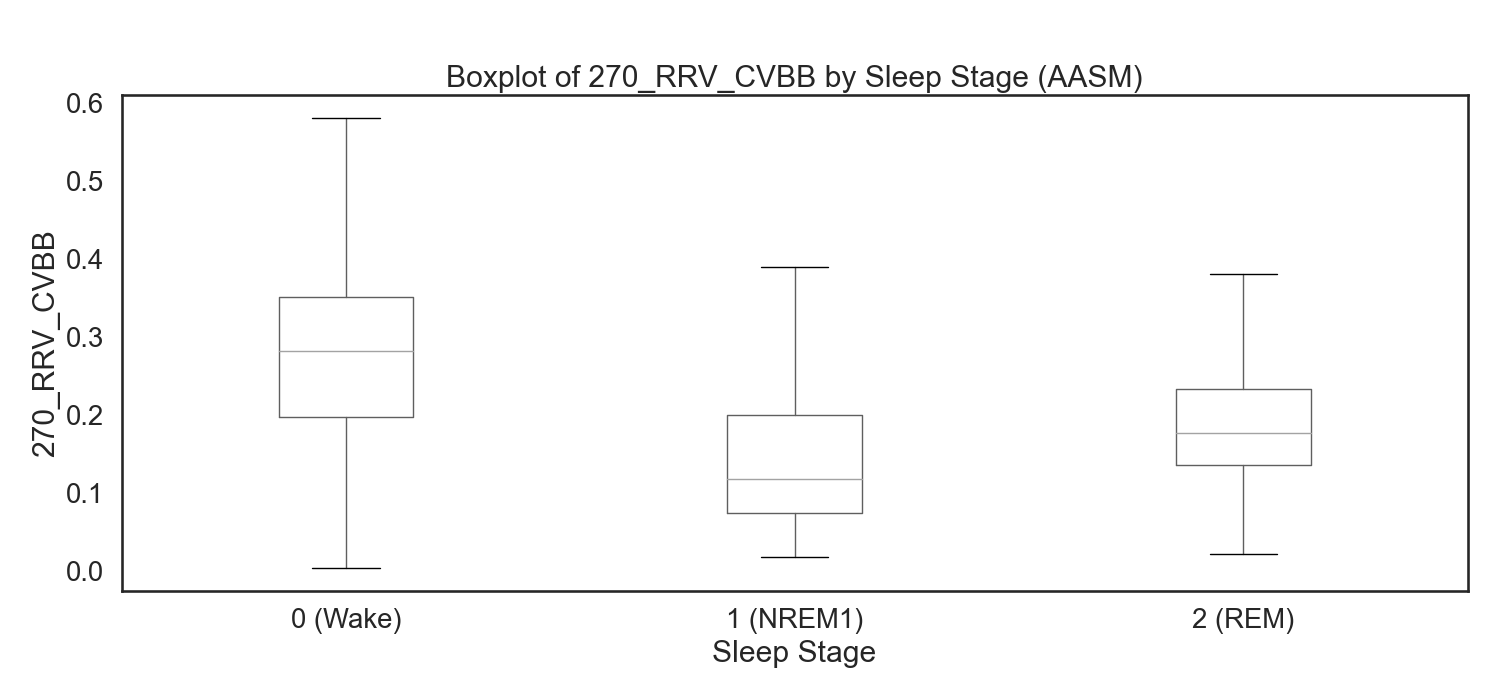

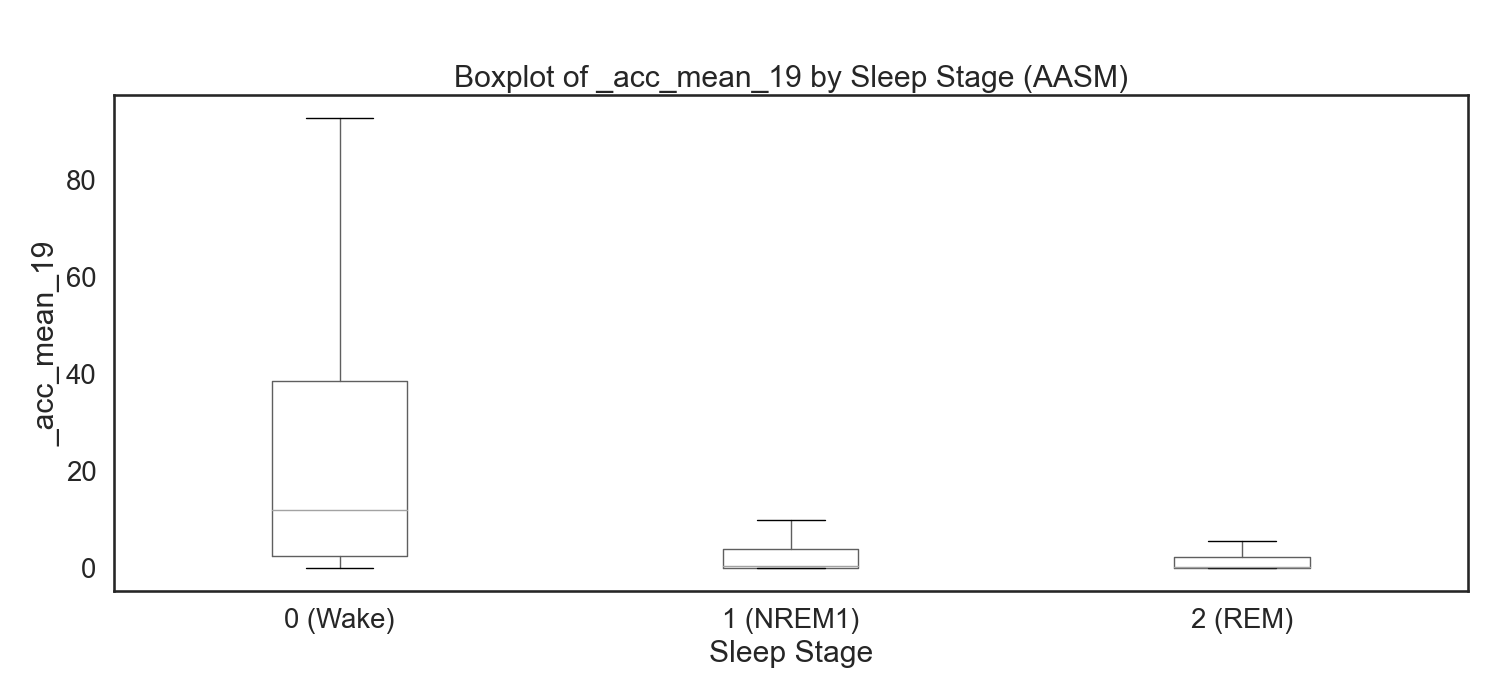

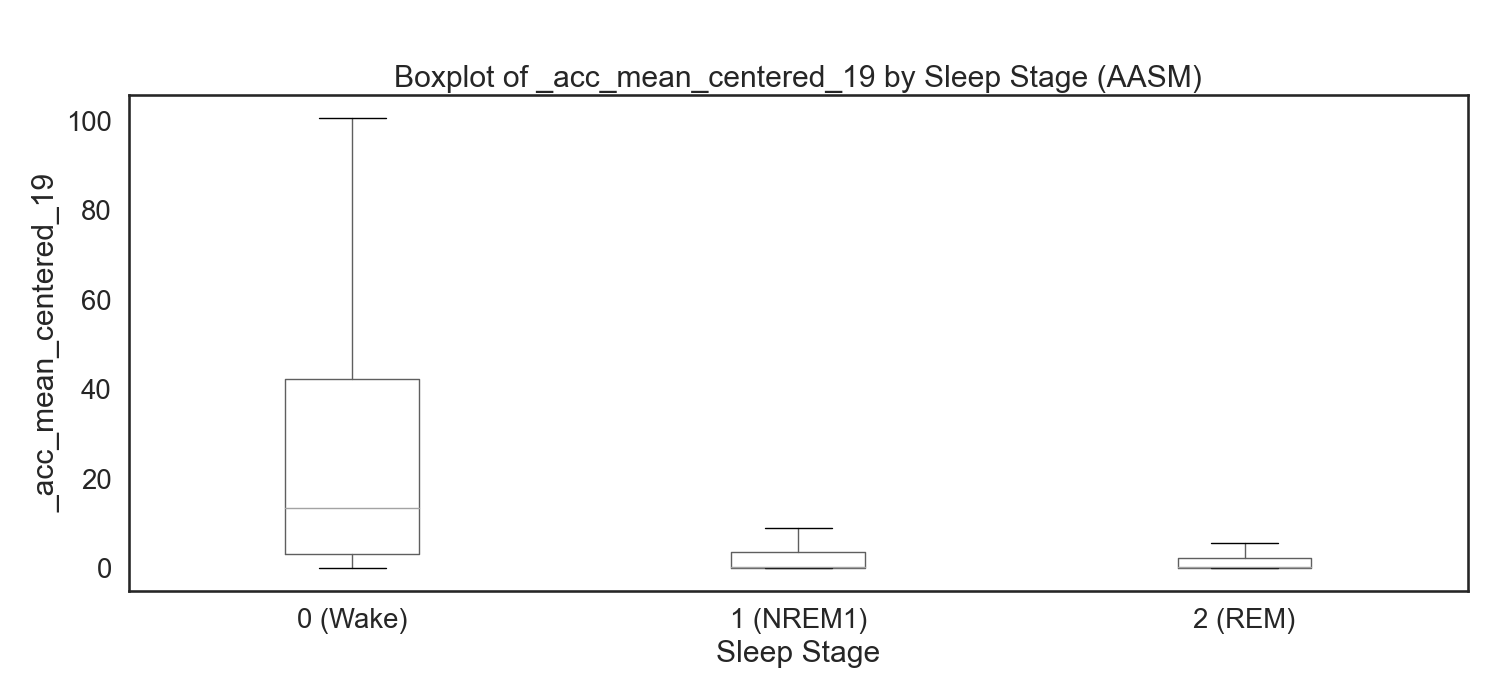

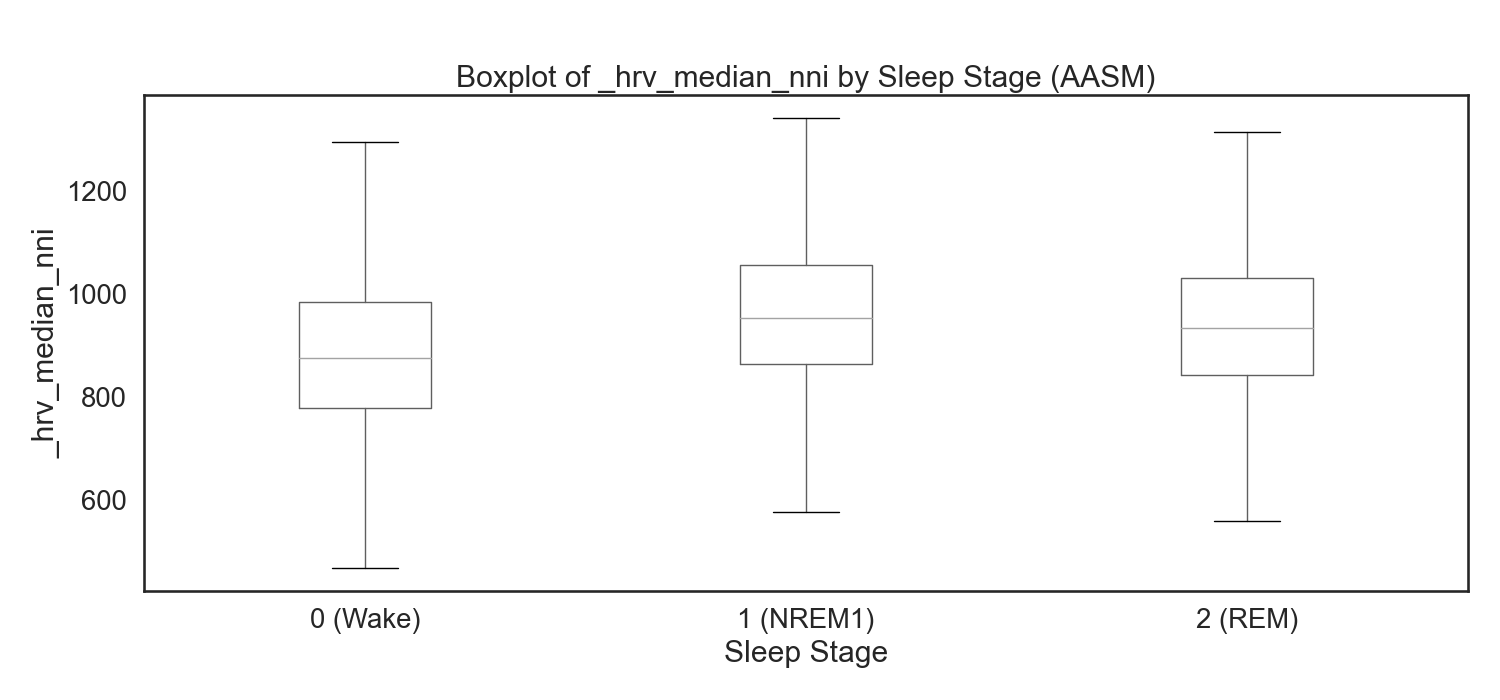

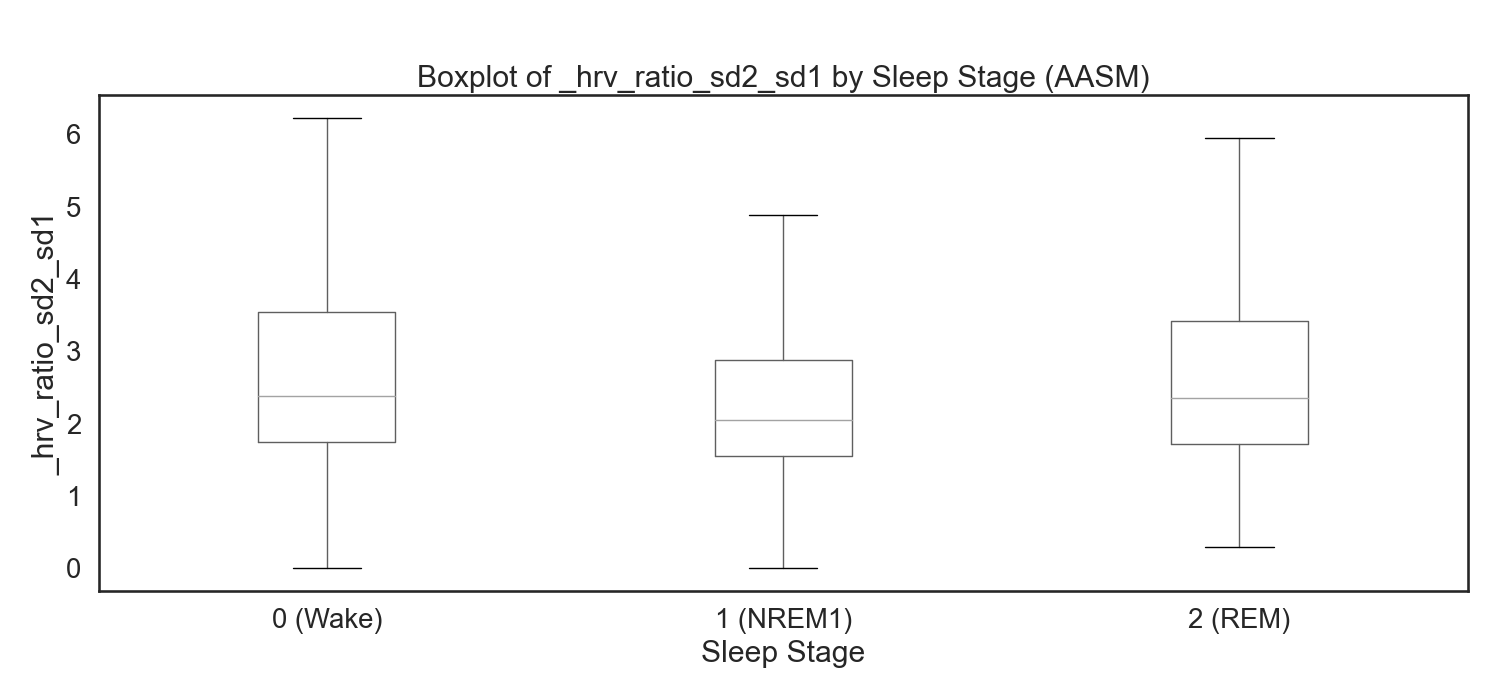

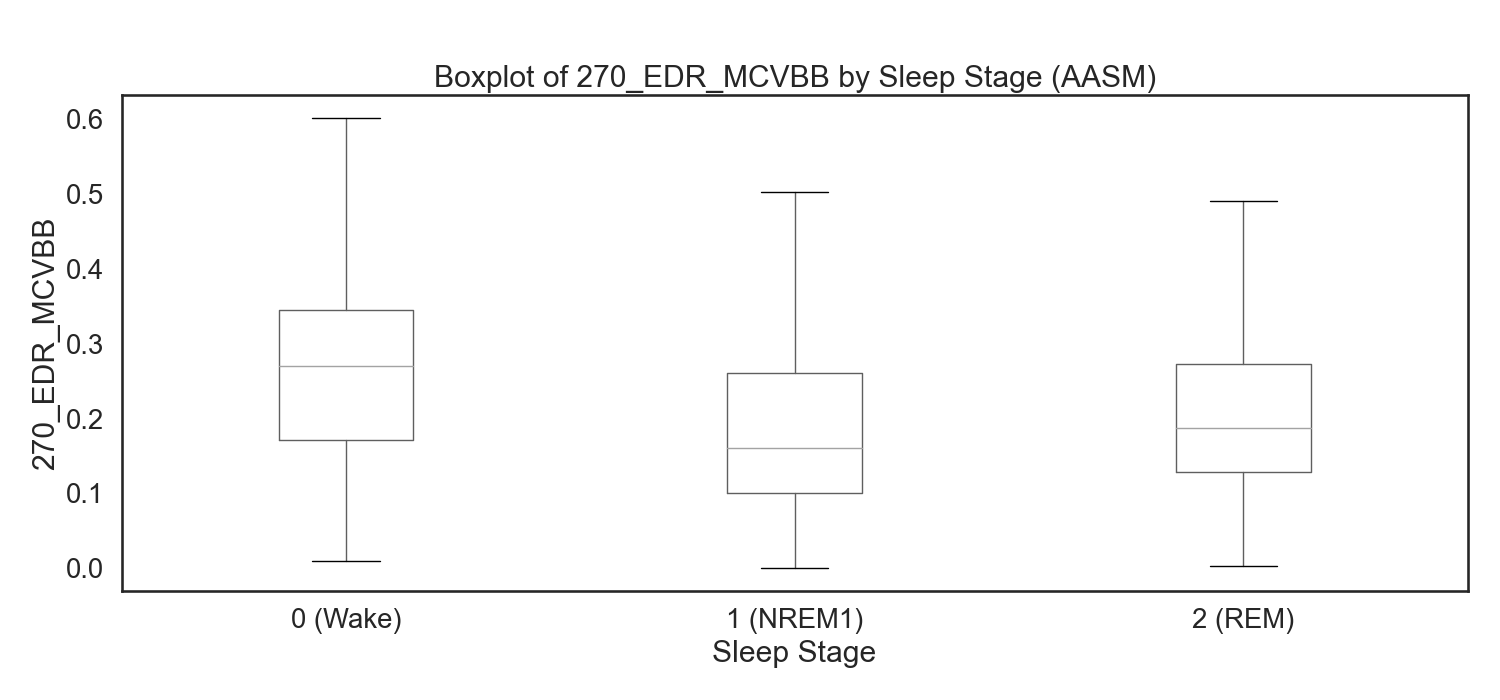

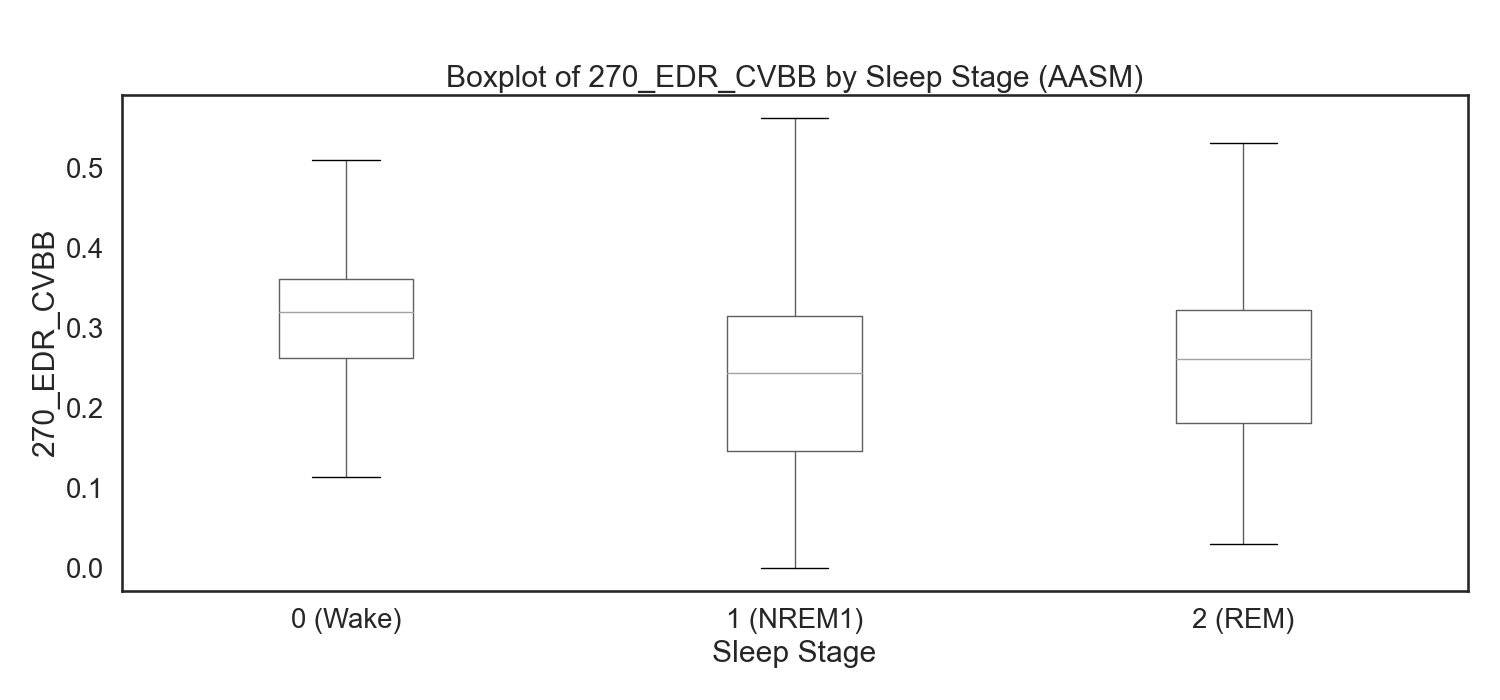

In [29]:
for feature in features.columns:
    merged_df.boxplot(column=feature, by='3stage', grid=False, showfliers=False, figsize=(15,7))
    plt.title(f'Boxplot of {feature} by Sleep Stage (AASM)')
    plt.suptitle('')  # Remove the secondary title
    plt.xlabel('Sleep Stage')
    plt.ylabel(feature)
    plt.xticks(ticks=range(1, 4), labels=['0 (Wake)', '1 (NREM1)', '2 (REM)'])
    plt.tight_layout()
    plt.show()